In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_core.messages import HumanMessage, BaseMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from langgraph.checkpoint.memory import MemorySaver

In [2]:
from langgraph.graph.message import add_messages
class ChatState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]

In [3]:
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

def chat_node(state: ChatState):
    messages = state["messages"]
    response = llm.invoke(messages)
    return {"messages": [response]}

E0000 00:00:1761294349.895007  274674 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


In [4]:
checkpointer = MemorySaver()

graph = StateGraph(ChatState)

graph.add_node("chat_node", chat_node)

graph.add_edge(START, "chat_node")
graph.add_edge("chat_node", END)

workflow = graph.compile(checkpointer=checkpointer)

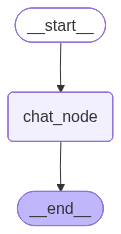

In [5]:
workflow

In [6]:
# Jab bhi chatbot initiate karna ho tab thread define karna hoga

thread_id = '1'

while True:

    user_input = input("You: ")
    if user_input.lower().strip() in ["exit", "quit", "bye"]:
        break

    config = {"configurable": {"thread_id": thread_id}}

    print("You:", user_input)
    initial_state = {
        "messages": [HumanMessage(content=user_input)]
    }
    response = workflow.invoke(initial_state, config=config)['messages'][-1].content
    print(f"Bot: {response}")

You: Hi! My name is Devansh Sharma
Bot: Hi Devansh! It's nice to meet you.
You: How r u
Bot: As an AI, I don't have feelings in the way humans do, but I'm functioning perfectly and ready to assist you!

How are you doing today, Devansh?
You: I m doing good. What is my name?
Bot: Your name is **Devansh Sharma**.


In [7]:
workflow.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='Hi! My name is Devansh Sharma', additional_kwargs={}, response_metadata={}, id='00dc06a1-952f-438f-bfdb-19b16c118a4d'), AIMessage(content="Hi Devansh! It's nice to meet you.", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'grounding_metadata': {}, 'model_provider': 'google_genai'}, id='lc_run--8840ab8e-8b8a-4ab9-af5d-3590789ac2bc-0', usage_metadata={'input_tokens': 9, 'output_tokens': 46, 'total_tokens': 55, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 34}}), HumanMessage(content='How r u', additional_kwargs={}, response_metadata={}, id='551f1db2-297e-4ba6-9207-2d405f27c6cf'), AIMessage(content="As an AI, I don't have feelings in the way humans do, but I'm functioning perfectly and ready to assist you!\n\nHow are you doing today, Devansh?", additional_kwargs={